In [1]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path

In [2]:
engineering_df=pd.read_csv('engineering.csv')

In [3]:
engineering_df=engineering_df.set_index('datetime')

In [4]:
grouped_eng_df=engineering_df.groupby(['datetime','item.id']).min()

In [5]:
grouped_eng_df.head(20)

id  quantity  unit_price time_left  \
datetime            item.id                                               
2023-12-22 18:41:00 190311   1876830765         1        2.75      LONG   
                    190314   1876655278         1      121.48      LONG   
                    190315   1876601366         1        5.00      LONG   
                    190316   1876607291         1       57.82      LONG   
                    190320   1876672851         1        6.52      LONG   
                    190321   1876672225         1       64.75      LONG   
                    190322   1876593102         1       33.01      LONG   
                    190324   1876653359         1      350.24      LONG   
                    190394   1876668414         1        1.19      LONG   
                    191380   1876771645         1        5.00      LONG   
                    198185   1876643901         1        1.11      LONG   
                    198186   1876606679         1       12.05      LONG   
                    198191   1876660829         1       12.89      LONG   
                    198194   1877267852         1       23.31      LONG   
                    198197   1878516341         1      600.00      LONG   
                    198200   1876753661         1      165.98      LONG   
                    198258   1877208221         1     1199.99      LONG   
2023-12-22 19:41:00 190311   1876830765         1        3.09      LONG   
                    190314   1876764989         1      122.00      LONG   
                    190315   1876769739         1        4.91      LONG   

                                               item.name   item.class  
datetime            item.id                                            
2023-12-22 18:41:00 190311                 Draconium Ore  Trade Goods  
                    190314               Khaz'gorite Ore  Trade Goods  
                    190315                 Rousing Earth  Trade Goods  
                    190316                Awakened Earth  Trade Goods  
                    190320                  Rousing Fire  Trade Goods  
                    190321                 Awakened Fire  Trade Goods  
                    190322                 Rousing Order  Trade Goods  
                    190324                Awakened Order  Trade Goods  
                    190394                  Serevite Ore  Trade Goods  
                    191380     Refreshing Healing Potion  Consumables  
                    198185     Handful of Serevite Bolts  Trade Goods  
                    198186             Shock-Spring Coil  Trade Goods  
                    198191   Everburning Blasting Powder  Trade Goods  
                    198194              Greased-Up Gears  Trade Goods  
                    198197            Arclight Capacitor  Trade Goods  
                    198200    Reinforced Machine Chassis  Trade Goods  
                    198258     Magazine of Healing Darts  Trade Goods  
2023-12-22 19:41:00 190311                 Draconium Ore  Trade Goods  
                    190314               Khaz'gorite Ore  Trade Goods  
                    190315                 Rousing Earth  Trade Goods

In [6]:
reset_eng_df=grouped_eng_df.reset_index()
reset_eng_df=reset_eng_df.set_index('datetime')
reset_eng_df.head()

item.id          id  quantity  unit_price time_left  \
datetime                                                                   
2023-12-22 18:41:00   190311  1876830765         1        2.75      LONG   
2023-12-22 18:41:00   190314  1876655278         1      121.48      LONG   
2023-12-22 18:41:00   190315  1876601366         1        5.00      LONG   
2023-12-22 18:41:00   190316  1876607291         1       57.82      LONG   
2023-12-22 18:41:00   190320  1876672851         1        6.52      LONG   

                           item.name   item.class  
datetime                                           
2023-12-22 18:41:00    Draconium Ore  Trade Goods  
2023-12-22 18:41:00  Khaz'gorite Ore  Trade Goods  
2023-12-22 18:41:00    Rousing Earth  Trade Goods  
2023-12-22 18:41:00   Awakened Earth  Trade Goods  
2023-12-22 18:41:00     Rousing Fire  Trade Goods

In [7]:
healing_dart_list=reset_eng_df['unit_price'].loc[reset_eng_df['item.id']==198258]
healing_dart_material_price=(reset_eng_df['unit_price'].loc[reset_eng_df['item.id']==191380]*10+
                                     reset_eng_df['unit_price'].loc[reset_eng_df['item.id']==198191]*3+
                                     reset_eng_df['unit_price'].loc[reset_eng_df['item.id']==198197]*1+
                                     reset_eng_df['unit_price'].loc[reset_eng_df['item.id']==198200]*1)
healing_dart_df=pd.DataFrame(healing_dart_list)
healing_dart_df['material_price']=healing_dart_material_price
healing_dart_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00     1199.99          854.65
2023-12-22 19:41:00     1199.99          935.20
2023-12-22 20:41:00     1199.99          900.20
2023-12-22 21:41:00     1199.99         1059.37
2023-12-22 22:41:00     1199.99          884.37
...                         ...             ...
2024-01-03 11:41:00     1982.51         1042.92
2024-01-03 12:41:00     1982.51          992.37
2024-01-03 13:41:00     1982.51         1045.27
2024-01-03 14:41:00     1982.51         1039.36
2024-01-03 15:41:00     1982.51          940.37

[285 rows x 2 columns]

In [8]:
healing_dart_df['potential_profit']=(healing_dart_df['unit_price']-healing_dart_df['material_price'])
healing_dart_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00     1199.99          854.65            345.34
2023-12-22 19:41:00     1199.99          935.20            264.79
2023-12-22 20:41:00     1199.99          900.20            299.79
2023-12-22 21:41:00     1199.99         1059.37            140.62
2023-12-22 22:41:00     1199.99          884.37            315.62
...                         ...             ...               ...
2024-01-03 11:41:00     1982.51         1042.92            939.59
2024-01-03 12:41:00     1982.51          992.37            990.14
2024-01-03 13:41:00     1982.51         1045.27            937.24
2024-01-03 14:41:00     1982.51         1039.36            943.15
2024-01-03 15:41:00     1982.51          940.37           1042.14

[285 rows x 3 columns]

<Axes: xlabel='datetime'>

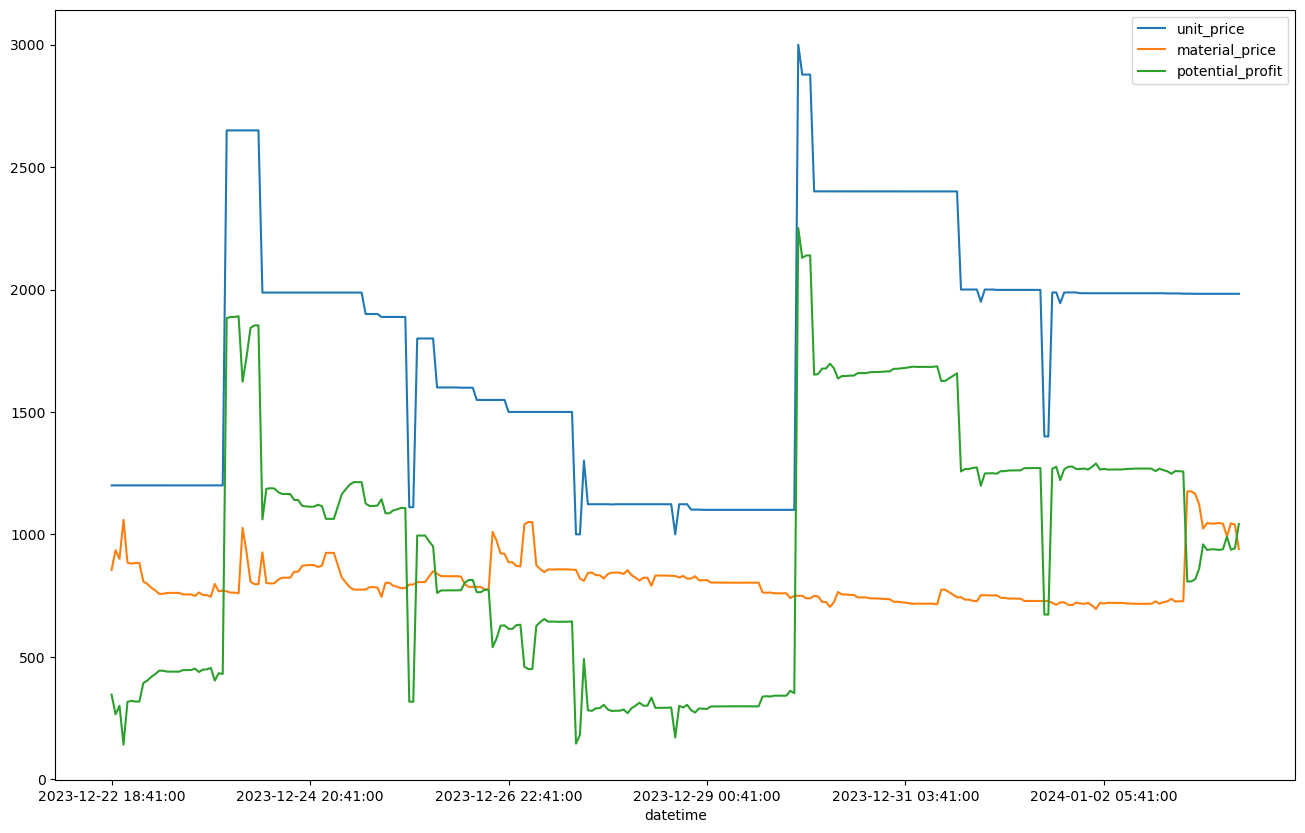

In [9]:
healing_dart_df.plot(figsize=(16,10))

In [10]:
healing_dart_df['potential_profit'].mean()

945.6675438596491

In [11]:
healing_dart_df.to_csv('C:/Users/gc20r/Desktop/python_challenges/Action_House/Auction_House/healing_dart.csv')